# Auxtel Spectra analysis : prediction transmission with gain and PTC

- Author : Sylvie Dagoret-Campagne
- creation date : 2023-12-12
- last update : 2023-12-12
- affiliation : IJCLab/IN2P3/CNRS

After a notebook from Jeremy Neveu

## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

from spectractor.tools import from_lambda_to_colormap, wavelength_to_rgb
%matplotlib widget 


In [2]:
import spectractor
from spectractor.simulation.throughput import load_transmission,plot_transmission_simple,TelescopeTransmission
from spectractor import parameters
from spectractor.extractor import dispersers
from spectractor.config import load_config,set_logger
import os

In [3]:
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'
plt.rcParams['legend.fontsize']=  12
plt.rcParams['font.size'] = 12

In [4]:
#from lsst.summit.utils.utils import checkStackSetup
#checkStackSetup()

In [5]:
import lsst.daf.butler as dafButler

repo = "/repo/main"
repo = "/repo/embargo"
# repo = "LATISS"
butler = dafButler.Butler(repo)
registry = butler.registry

for c in sorted(registry.queryCollections()):
    #if "u/jneveu" in c and "auxtel_atmo" in c:
    #if "u/dagoret" in c:
    if "u/dagoret" in c and "auxtel_atmo_202301_v3.0.3" in c:
        print(c)

u/dagoret/auxtel_atmo_202301_v3.0.3_doGainsNOPTC_rebin2_231208
u/dagoret/auxtel_atmo_202301_v3.0.3_doGainsNOPTC_rebin2_231208/20231208T215202Z
u/dagoret/auxtel_atmo_202301_v3.0.3_doGainsPTC_rebin2_231208
u/dagoret/auxtel_atmo_202301_v3.0.3_doGainsPTC_rebin2_231208/20231208T211104Z


## Config

### Config collection

In [6]:
my_collection = "u/dagoret/auxtel_atmo_202301_v3.0.3_doGainsPTC_rebin2_231208"
#my_collection = "u/dagoret/auxtel_atmo_202301_v3.0.3_doGainsNOPTC_rebin2_231208"

### Config Auxtel

In [7]:
#config_path = "~/repos/repos_w_2023_44/Spectractor/config/auxtel.ini"
#config_path = "/home/d/dagoret/repos/repos_w_2023_44/Spectractor/config/auxtel.ini"
config_fullpath = os.path.join(spectractor.__path__[0],"../config/auxtel.ini")
throughput_filename="multispectra_holo4_003_HD142331_20230802_AuxTel_doGainsPTC_v3.0.3_throughput.txt"

In [8]:
load_config(config_fullpath)

### Config Telescope Throughtput

In [9]:
throughput_fullpath = os.path.join(spectractor.__path__[0],parameters.THROUGHPUT_DIR)
throughput_fullfilename = os.path.join(throughput_fullpath,throughput_filename)

In [10]:
tel_lambdas, tel_thr, tel_errthr = load_transmission(throughput_fullfilename) 

In [11]:
parameters.THROUGHPUT_DIR = throughput_fullpath 
parameters.OBS_FULL_INSTRUMENT_TRANSMISSON = throughput_filename
print(parameters.THROUGHPUT_DIR )
print(parameters.OBS_FULL_INSTRUMENT_TRANSMISSON)

/home/d/dagoret/repos/repos_w_2023_44/Spectractor/lib/python/spectractor/simulation/AuxTelThroughput/
multispectra_holo4_003_HD142331_20230802_AuxTel_doGainsPTC_v3.0.3_throughput.txt


In [12]:
%matplotlib inline
tel = TelescopeTransmission()
tel.plot_transmission()

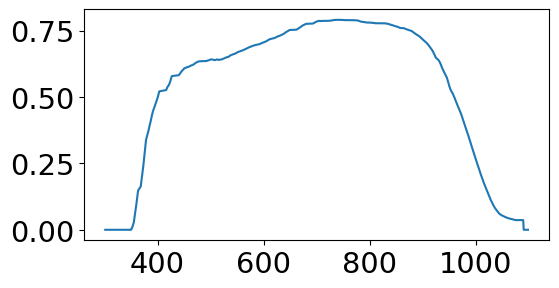

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot()
ax.plot(tel_lambdas,tel.transmission(tel_lambdas))

### Config disperser

In [14]:
disp = dispersers.Hologram("holo4_003")

## Load config filename for Auxtel

In [15]:
load_config(config_fullpath)

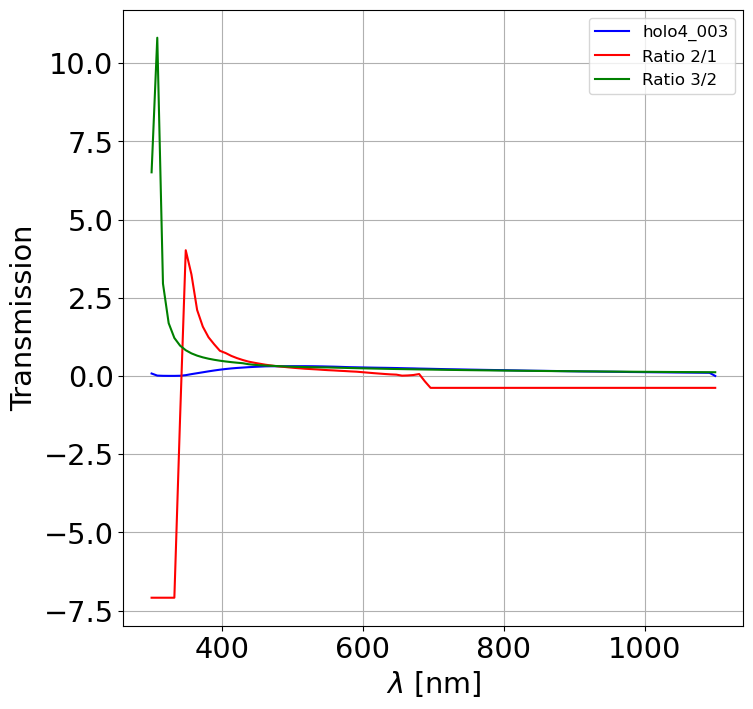

In [16]:
disp.plot_transmission()

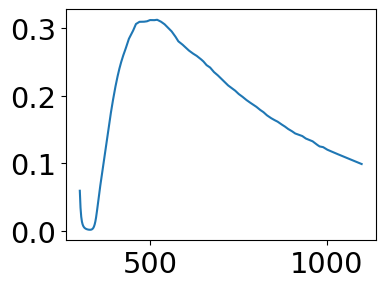

In [17]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot()
ax.plot(tel_lambdas,disp.transmission(tel_lambdas))

## Check the presence of the spectra

### select the date of observation

In [18]:
DATEOBS = 20231207

In [19]:
where = f"instrument='LATISS' and visit.day_obs={DATEOBS}" 
#where = "instrument='LATISS' "
records = list(butler.registry.queryDimensionRecords('visit', datasets='spectractorSpectrum', where=where,  collections=my_collection))
# records = list(butler.registry.queryDimensionRecords('visit', datasets='raw', where=where))

In [20]:
print(">>> Number of records : ",len(records))
records[-1]

>>> Number of records :  23


visit.RecordClass(instrument='LATISS', id=2023120700453, physical_filter='empty~holo4_003', name='AT_O_20231207_000453', day_obs=20231207, seq_num=453, exposure_time=60.0, target_name='HD38666', observation_reason='object', science_program='spec-survey', azimuth=108.77628806957458, zenith_angle=7.142333743178, region=ConvexPolygon([UnitVector3d(0.05029563247973025, 0.844069422986299, -0.5338699827982842), UnitVector3d(0.052373787292272315, 0.8441988795891799, -0.533465311060651), UnitVector3d(0.05277789195969841, 0.843085014597839, -0.5351842227503086), UnitVector3d(0.05069973711319478, 0.8429555580516903, -0.5355888944016823)]), timespan=Timespan(begin=astropy.time.Time('2023-12-08 04:51:45.590987', scale='tai', format='iso'), end=astropy.time.Time('2023-12-08 04:52:45.826000', scale='tai', format='iso')))

### List first of first records

In [21]:
first_seqnum = []

for i, r in enumerate(records):

    print(f"============= ({i}) ============datasetType = spectraction ============================================")
    print("fullId..................:",r.id)
    print("day_obs..................:",r.day_obs)
    print("target..................:",r.target_name)
    print("filt+disp..................:",r.physical_filter)
    seqnum = r.id-r.day_obs*100000
    print("seqnum ....................:",seqnum)
    first_seqnum.append(seqnum)

    # spec = butler.get('spectractorSpectrum', visit=r.id, detector=0, collections=my_collection, instrument='LATISS')
    
    if i>5:
        break

============= (0) ============datasetType = spectraction ============================================
fullId..................: 2023120700288
day_obs..................: 20231207
target..................: HD185975
filt+disp..................: empty~holo4_003
seqnum ....................: 288
============= (1) ============datasetType = spectraction ============================================
fullId..................: 2023120700289
day_obs..................: 20231207
target..................: HD185975
filt+disp..................: empty~holo4_003
seqnum ....................: 289
============= (2) ============datasetType = spectraction ============================================
fullId..................: 2023120700302
day_obs..................: 20231207
target..................: HD38666
filt+disp..................: empty~holo4_003
seqnum ....................: 302
============= (3) ============datasetType = spectraction ============================================
fullId..................: 

In [22]:
# delete a collection
# butler.pruneDatasets(datasetRefs, disassociate=True, unstore=True, purge=True)

## Load one spectrum

In [23]:
sel_seqnum = first_seqnum[-3] 

In [24]:
dataId = {"day_obs": DATEOBS, "seq_num": sel_seqnum, 'instrument':'LATISS',"detector": 0}
spec= butler.get('spectractorSpectrum',dataId,collections=my_collection)
p = butler.get('spectrumLibradtranFitParameters',dataId,collections=my_collection)
p

************ getObsAtmo imported ************* 
/home/d/dagoret/.local/lib/python3.11/site-packages/getObsAtmo
>>>> _getPackageDir /home/d/dagoret/.local/lib/python3.11/site-packages/getObsAtmo
>>>> getObsSiteDataFrame      altitude   pressure
LSST    2.663  731.50433
CTIO    2.207   774.6052
OHP      0.65  937.22595
PDM    2.8905  710.90637
OMK     4.205  600.17224
OSL       0.0     1013.0


FitParameters(values=array([1.48415651e+00, 0.00000000e+00, 9.57252848e-02, 4.48298560e-01,
       3.46466960e+02, 4.92834522e+00, 1.00404975e+00, 1.86547107e+02,
       5.65733991e-01, 0.00000000e+00]), labels=['A1', 'A2', 'VAOD', 'angstrom_exp', 'ozone [db]', 'PWV [mm]', 'reso [pix]', 'D_CCD [mm]', 'alpha_pix [pix]', 'B'], axis_names=['$A_1$', '$A_2$', 'VAOD', '$\\"a$', 'ozone [db]', 'PWV [mm]', 'reso [pix]', '$D_{CCD}$ [mm]', '$\\alpha_{\\mathrm{pix}}$ [pix]', '$B$'], bounds=[[0, 2], [0, 20.0], [0, 0.1], [0, 3], [0.0, 600.0], [0.0, 10.0], [0.1, 10], [184.54834804602567, 188.54834804602567], [-2, 2], [-inf, inf]], fixed=[False, True, False, False, False, False, False, False, True, True], truth=None, filename='', extra=None)

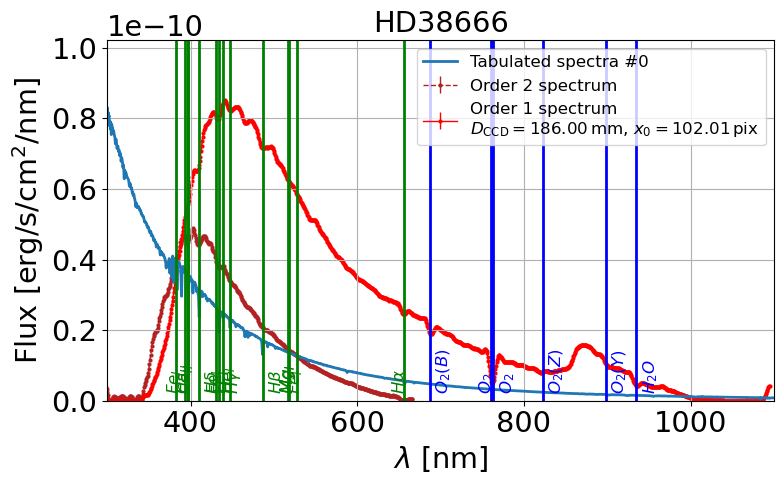

In [25]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
_ = spec.plot_spectrum(force_lines=True,ax=ax)

## Load all 1D spectrum and fitted atmospheric parameters

Three kind of informations:
 - 1D Spectrum : ``spectractorSpectrum``
 - atmospheric parameters fitted on 1D spectrum ``spectrumLibradtranFitParameters``
 - atmospheric parameters fitted on Spectrogram ``spectrogramLibradtranFitParameters``

In [26]:
params_spectrum = []
params_spectrogram = []
times = []
headers = []
spectra = []

for i, r in enumerate(records):
    try:
        times.append(r.day_obs)
        spec =  butler.get('spectractorSpectrum', visit=r.id, collections=my_collection, detector=0, instrument='LATISS')
        headers.append(spec.header)
        spectra.append(spec)
        p = butler.get('spectrumLibradtranFitParameters', visit=r.id, collections=my_collection, detector=0, instrument='LATISS')
        params_spectrum.append(p)
        p = butler.get('spectrogramLibradtranFitParameters', visit=r.id, collections=my_collection, detector=0, instrument='LATISS')
        params_spectrogram.append(p)
    #except ValueError:
    except Exception as inst:
        except_type = type(inst)
        except_args = inst.args
        print("catch exception ", inst, "type =",except_type, "args = ",except_args) 
        print("\t >>>>> Skip record ", r.id)
        continue

In [27]:
len(params_spectrogram)

23

## Filtering data

In [28]:
def select_files(collection, where):
    """
    Select all records according the where clause
    """
    # datasetRefs = registry.queryDatasets(datasetType='spectractorSpectrum', collections=my_collection, where=where)
    #records = list(butler.registry.queryDimensionRecords('exposure', where=where))
    records = list(butler.registry.queryDimensionRecords('exposure', datasets='spectractorSpectrum', where=where,  collections=collection))
    records = sorted(records, key=lambda x: x.id, reverse=False)
    return records

def filter_data(records, sigma_clip=3):  # pragma: no cover
    """
    Spectrum reconstruction Quality Selection
    """
    from scipy.stats import median_abs_deviation
    D = []
    chi2 = []
    dx = []
    amplitude = []
    regs = []
    times = []
    specs = []
    alpha_0_2 = []
    #parameters.VERBOSE = False
    #parameters.DEBUG = False
    for i, r in enumerate(records):
        times.append(r.day_obs)
        spec = butler.get('spectractorSpectrum', visit=r.id, collections=my_collection, detector=0, instrument='LATISS')
        spec.dataId = r.id
        if spec.x0[0] > 500: 
            continue
        D.append(spec.header["D2CCD"])
        dx.append(spec.header["PIXSHIFT"])
        regs.append(np.log10(spec.header["PSF_REG"]))
        amplitude.append(np.sum(np.abs(spec.data[300:])))
        # if "CHI2_FIT" in header:
        chi2.append(spec.header["CHI2_FIT"])
        specs.append(spec)
        p = butler.get('spectrumForwardModelFitParameters', visit=r.id, collections=my_collection, detector=0, instrument='LATISS')
        alpha_0_2.append(p.values[p.get_index("alpha_0_2")])
        #except:
        #    new_file_names.remove(name)
        #    print(f"fail to open {name}. len(file_names)={len(new_file_names)}")
    params = {'D2CCD': np.array(D),
              'dx': np.array(dx),
              'regs': np.array(regs),
              'chi2': np.array(chi2),
              'amplitude': np.array(amplitude),
              'alpha_0_2': np.array(alpha_0_2)
             }
    k = np.arange(len(D))
    filter_indices = np.ones_like(k, dtype=bool)
    for par in params.keys():
        if par in ['amplitude']: #, 'alpha_0_2']:
            continue
        filter_indices *= np.logical_and(params[par] > np.median(params[par]) - sigma_clip * median_abs_deviation(params[par]),
                                         params[par] < np.median(params[par]) + sigma_clip * median_abs_deviation(params[par]))
    for par in params.keys():
        fig = plt.figure(figsize=(8,4))
        plt.plot(k, params[par])
        plt.plot(k[filter_indices], params[par][filter_indices], "ko")
        plt.grid()
        plt.title(par)

        suptitle = f"Observations : {DATEOBS} \n collection = {my_collection}"
        plt.suptitle(suptitle,fontsize=10,y=1.00)
        plt.show()
    return [s for i,s in enumerate(specs) if filter_indices[i]]


def plot_spectra(spectra, colorparams):
    """
    plot spectra
    """

    import matplotlib.colors as mcolors
    import matplotlib.cm as cm
    colormap = cm.Reds
    #colormap = cm.jet 

    normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))

    all_target_names = [] 

    fig  = plt.figure(figsize=(11,6))
    for spec in spectra:
        target_name = spec.target.label
        if target_name in all_target_names:
            plt.plot(spec.lambdas, spec.data, color = colormap(normalize(spec.airmass)))
        else:
            plt.plot(spec.lambdas, spec.data, color = colormap(normalize(spec.airmass)),label=target_name)
            all_target_names.append(target_name)
            
    plt.grid()
    plt.xlabel("$\lambda$ [nm]")
    plt.ylabel(f"Flux [{spec.units}]")
    plt.legend()
    
    # Colorbar setup
    s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
    s_map.set_array(colorparams)

    # If color parameters is a linspace, we can set boundaries in this way
    halfdist = (colorparams[1] - colorparams[0])/2.0
    boundaries = np.linspace(colorparams[0] - halfdist, colorparams[-1] + halfdist, len(colorparams) + 1)

    # Use this to emphasize the discrete color values
    cbar = fig.colorbar(s_map) #, spacing='proportional', ticks=colorparams, boundaries=boundaries, format='%2.2g') # format='%2i' for integer

    # Use this to show a continuous colorbar
    #cbar = fig.colorbar(s_map, spacing='proportional', ticks=colorparams, format='%2i')
    cbar.set_label("Airmass $z$")
    title = f"Observations : {DATEOBS}"
    suptitle = f"collection = {my_collection}"
    plt.title(title)
    plt.suptitle(suptitle,fontsize=10)
    plt.show()
    return fig



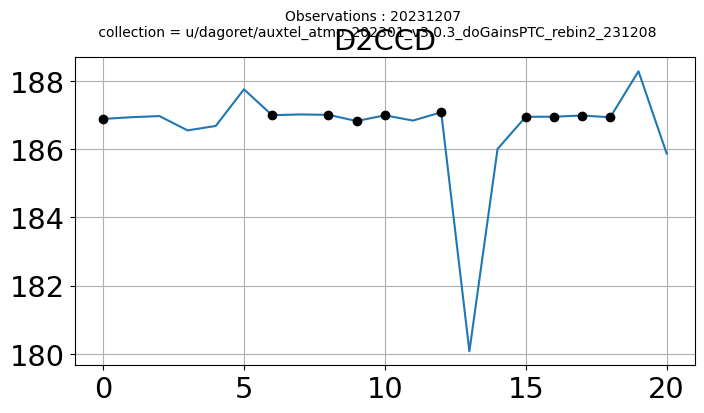

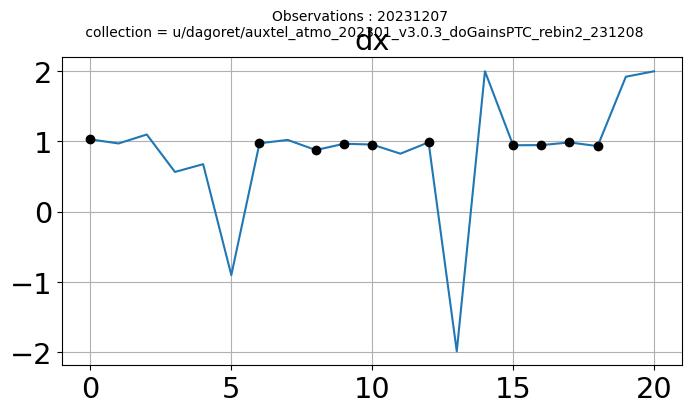

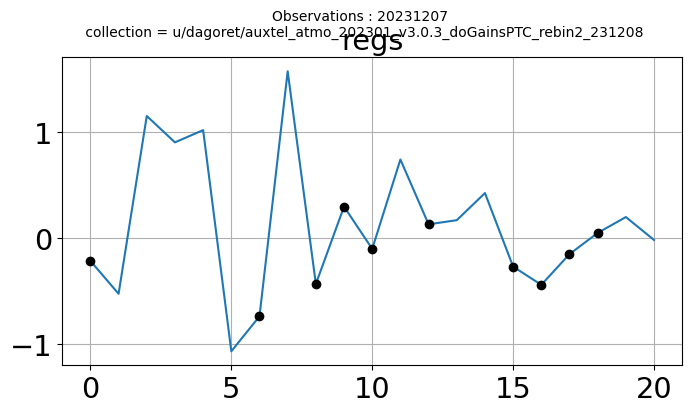

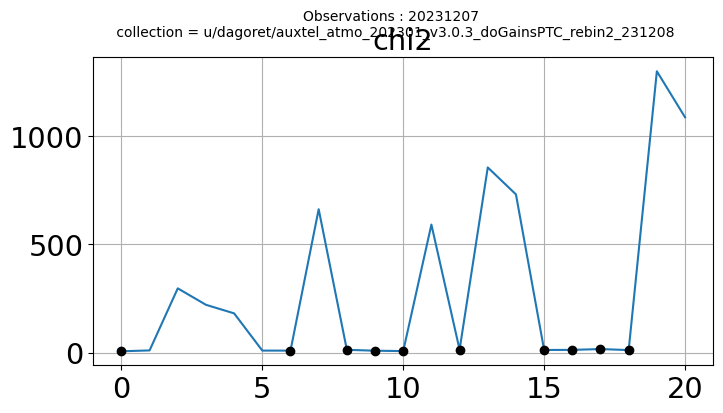

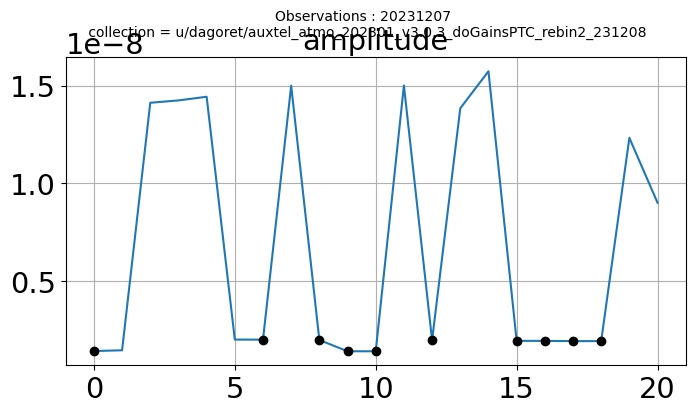

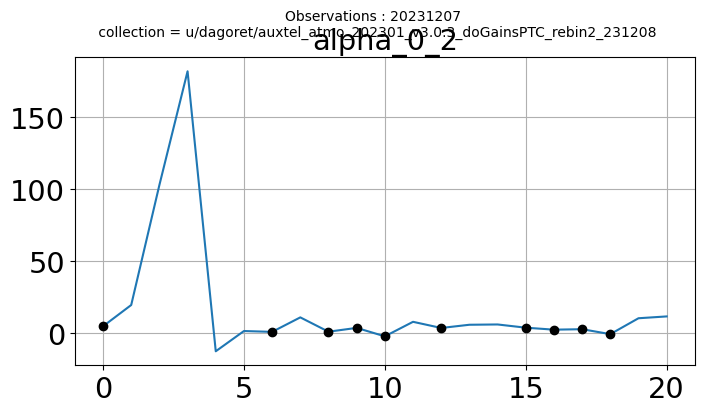

In [29]:
spectra_filtered = filter_data(records)

/tmp/ipykernel_85795/2290022125.py:108: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(s_map) #, spacing='proportional', ticks=colorparams, boundaries=boundaries, format='%2.2g') # format='%2i' for integer


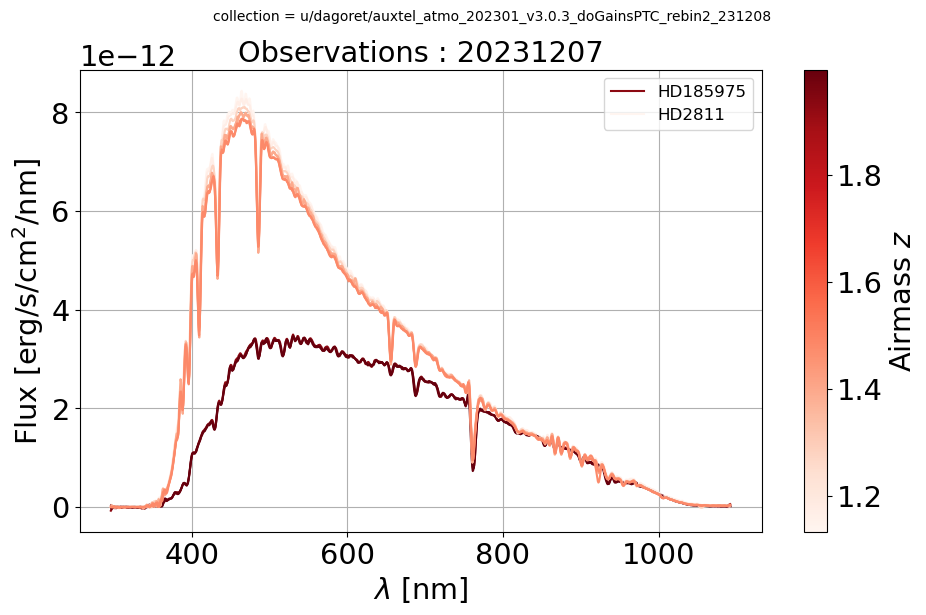

In [30]:
fig = plot_spectra(spectra_filtered, [spec.airmass for spec in spectra_filtered])

In [31]:
list_of_targets = np.unique([spec.target.label for spec in spectra_filtered])
print(">>> List of targets ",list_of_targets)

>>> List of targets  ['HD185975' 'HD2811']


In [32]:
import getCalspec.getCalspec as gcal

In [33]:
all_calspecs = {}
for target_name in list_of_targets:
    c =  gcal.Calspec(target_name)
    all_calspecs[target_name] = c.get_spectrum_numpy() 

In [34]:
all_calspecs.keys()

dict_keys(['HD185975', 'HD2811'])

(3000.0, 10000.0)

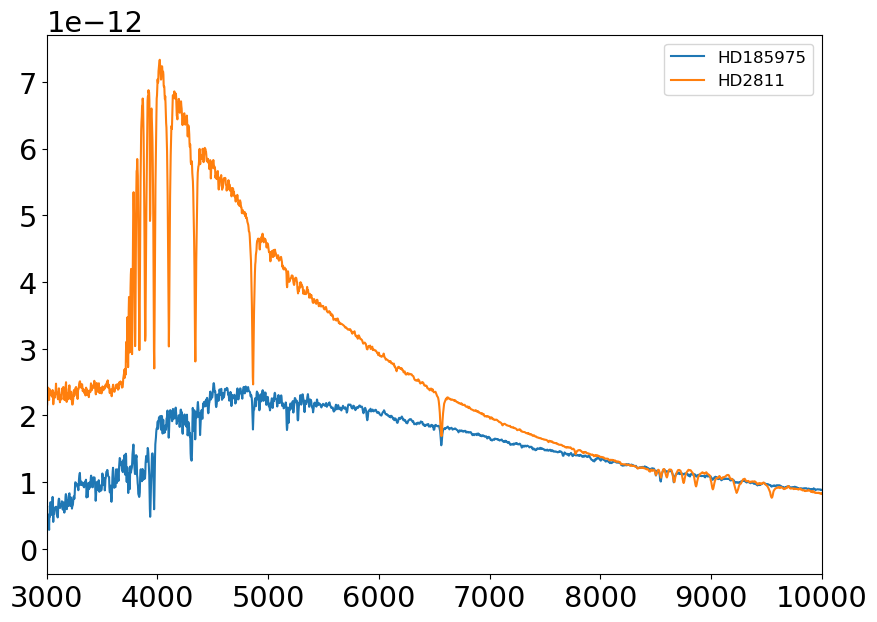

In [35]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

for target_name in list_of_targets:
    c_dict = all_calspecs[target_name]
    ax.plot(c_dict["WAVELENGTH"].value,c_dict["FLUX"].value,label=target_name)
ax.legend()
ax.set_xlim(3000.,10000.)    

In [36]:
c_dict["WAVELENGTH"].value

array([  1140.1373291,   1140.720947 ,   1141.304565 , ...,
       318350.       , 318625.       , 318899.       ])

## Plot ratio

In [57]:
def plot_atmtransmission(spectra, colorparams):
    """
    plot spectra
    """

    import matplotlib.colors as mcolors
    import matplotlib.cm as cm
    colormap = cm.Reds
    #colormap = cm.jet 

    normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))

    all_shown_target_names = [] 
    
    fig  = plt.figure(figsize=(11,6))
    for spec in spectra:
        
        
        target_name = spec.target.label

        wls = spec.lambdas
        flx = spec.data
        flx_err = spec.err
        
        c_dict = all_calspecs[target_name]
        sed=np.interp(wls, c_dict["WAVELENGTH"].value/10.,c_dict["FLUX"].value*10.,left=1e-15,right=1e-15)
       
                     
        ratio = flx/tel.transmission(wls)/disp.transmission(wls)/sed
       
        indexes = np.where(np.logical_and(wls>350.,wls<=1000.))[0]
       
        sel_wls = wls[indexes]
        sel_ratio = ratio[indexes]
        
        if target_name in all_shown_target_names:
            plt.plot(sel_wls, sel_ratio, color = colormap(normalize(spec.airmass)))
        else:
            plt.plot(sel_wls,sel_ratio, color = colormap(normalize(spec.airmass)),label=target_name)
            all_shown_target_names.append(target_name)
            
     
            
    plt.grid()
    plt.xlabel("$\lambda$ [nm]")
    #plt.ylabel(f"Flux [{spec.units}]")
    plt.legend()
    plt.xlim(370.,1000.)  
    plt.ylim(0.,1.2)  
    
    # Colorbar setup
    s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
    s_map.set_array(colorparams)

    # If color parameters is a linspace, we can set boundaries in this way
    halfdist = (colorparams[1] - colorparams[0])/2.0
    boundaries = np.linspace(colorparams[0] - halfdist, colorparams[-1] + halfdist, len(colorparams) + 1)

    # Use this to emphasize the discrete color values
    cbar = fig.colorbar(s_map) #, spacing='proportional', ticks=colorparams, boundaries=boundaries, format='%2.2g') # format='%2i' for integer

    # Use this to show a continuous colorbar
    #cbar = fig.colorbar(s_map, spacing='proportional', ticks=colorparams, format='%2i')
    cbar.set_label("Airmass $z$")
    title = f"Observations : {DATEOBS}"
    suptitle = f"collection = {my_collection}"
    plt.title(title)
    plt.suptitle(suptitle,fontsize=10)
    plt.show()
    



/tmp/ipykernel_85795/2429582015.py:29: RuntimeWarning: divide by zero encountered in divide
  ratio = flx/tel.transmission(wls)/disp.transmission(wls)/sed
/tmp/ipykernel_85795/2429582015.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(s_map) #, spacing='proportional', ticks=colorparams, boundaries=boundaries, format='%2.2g') # format='%2i' for integer


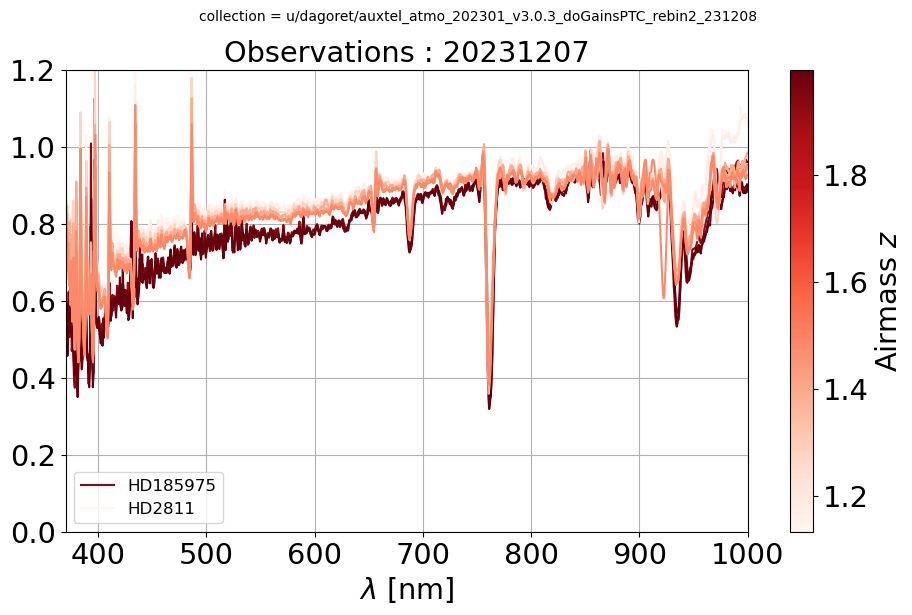

In [58]:
plot_atmtransmission(spectra_filtered, [spec.airmass for spec in spectra_filtered])

In [40]:
ratio

NameError: name 'ratio' is not defined

In [ ]:
sed

In [49]:
spectra_filtered[0].lambdas

array([ 295.83359554,  296.54643264,  297.25924781, ..., 1090.74392779,
       1091.42921717, 1092.11447115])